In [2]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load train and test data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
# (1) Check the structure of the data to identify the label column
print(train.head())
print(train.columns)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
# (2) Identify label column - assuming column 'label' (you can replace this with the correct label column)
label_column = 'label'  # Replace this with the actual label column name if different

In [5]:
# (3) Separate features and labels
Y_train = train[label_column]  # Labels
X_train = train.drop(columns=[label_column])  # Features (images)

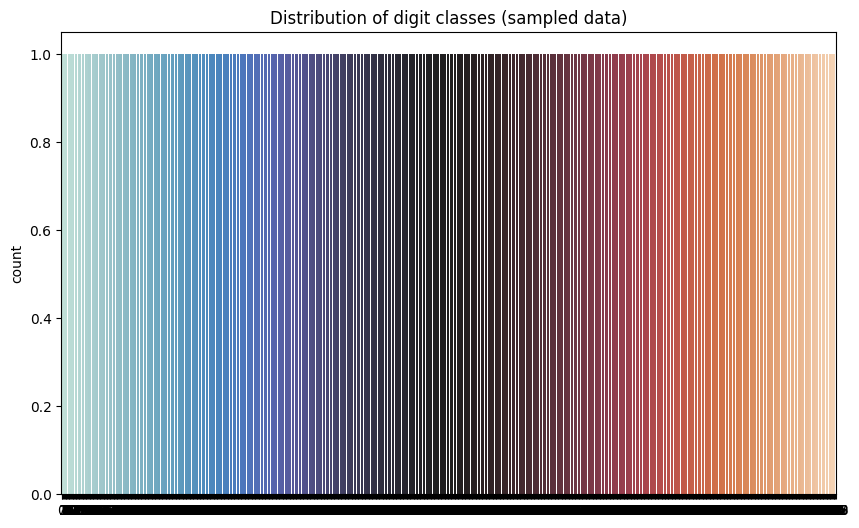

In [6]:
# (4) Visualize the number of samples in each class (sampled for efficiency)
plt.figure(figsize=(10,6))

# Take a sample of the data for visualization (use 1000 samples or less)
sampled_Y_train = Y_train[:1000]  # Adjust the number of samples as needed

sns.countplot(sampled_Y_train, palette="icefire")
plt.title("Distribution of digit classes (sampled data)")
plt.show()

In [7]:
# (5) Normalize the data (values between 0 and 1)
X_train = X_train / 255.0
test = test / 255.0

In [8]:
# (6) Reshape the data to fit the CNN model (28x28 images with 1 channel for grayscale)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [9]:
# (7) One-hot encode the labels (since there are 10 classes, digits 0-9)
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=10)

In [10]:
# (8) Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [11]:
# (9) Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes (digits 0-9)

In [12]:
# (10) Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# (11) Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=64)

Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.8027 - loss: 0.6147 - val_accuracy: 0.9717 - val_loss: 0.0898
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.9682 - loss: 0.1093 - val_accuracy: 0.9826 - val_loss: 0.0521
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9768 - loss: 0.0775 - val_accuracy: 0.9860 - val_loss: 0.0395
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.9825 - loss: 0.0595 - val_accuracy: 0.9867 - val_loss: 0.0408
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9841 - loss: 0.0527 - val_accuracy: 0.9893 - val_loss: 0.0347
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9879 - loss: 0.0402 - val_accuracy: 0.9883 - val_loss: 0.0402
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.9859 - loss: 0.0414 - val_accuracy: 0.9862 - val_loss: 0.0355
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 34s 58ms/step - accuracy: 0.9890 - loss: 0.0337 - 

In [14]:
# (12) Evaluate the model
score = model.evaluate(X_val, Y_val, verbose=0)
print(f'Validation accuracy: {score[1]*100:.2f}%')

Validation accuracy: 98.95%


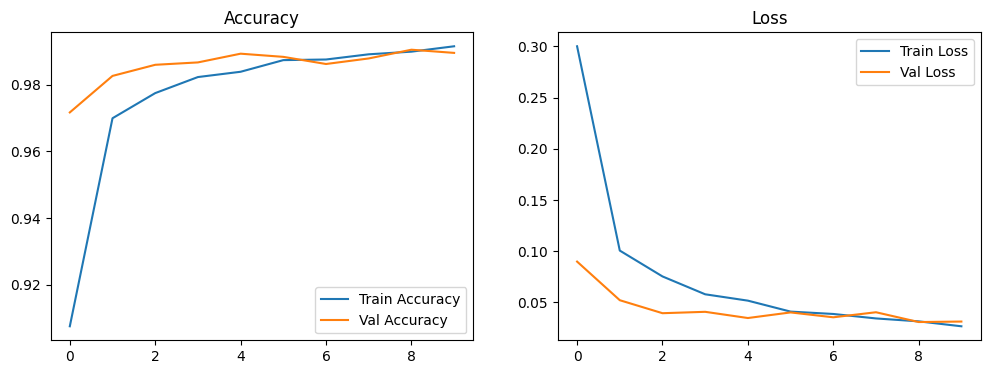

In [15]:
# (13) Plot the training and validation accuracy/loss over time
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [16]:
# (14) Predict on the test set
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


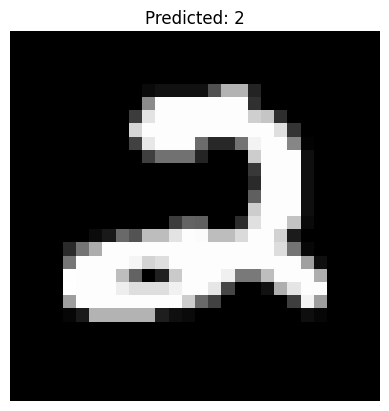

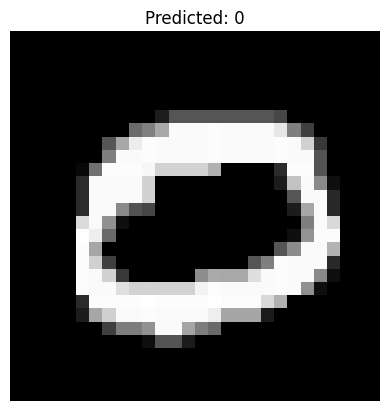

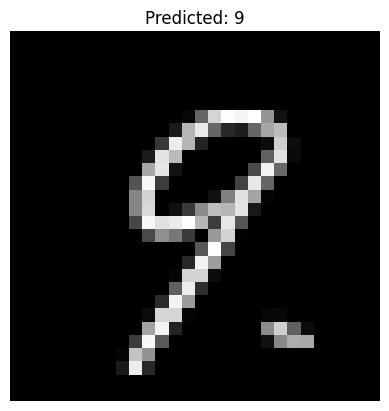

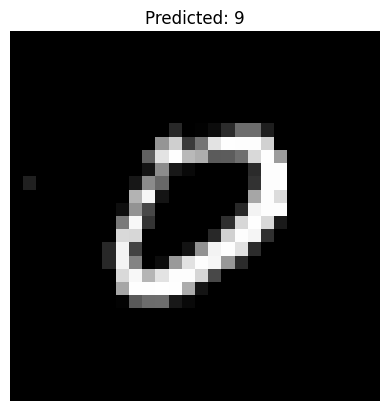

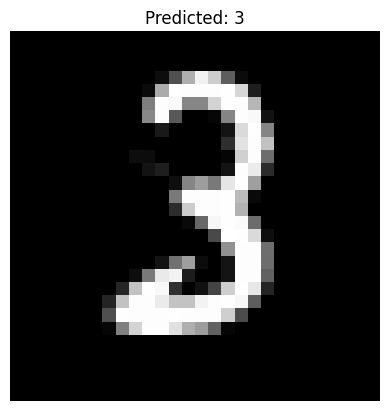

In [17]:
# (15) Visualize some predictions
for i in range(5):
    plt.imshow(test[i].reshape(28,28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')
    plt.show()